In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
import matplotlib
import statsmodels.formula.api as smf
import pickle
import re
from collections import Counter,defaultdict
from tqdm.notebook import tqdm
tqdm.pandas()

/home/xh3993/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('/data/sharedleadership/team2.csv')

/home/xh3993/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.columns

Index(['tid', 'aname', 'aid', 'aorg', 'p_year', 'references', 'fos',
       'citation2', 'citation5', 'references_age', 'len', 'sci_age',
       'citation_all', 'hindex', 'hindex_mean', 'citation2_rank',
       'citation5_rank', 'phyical', 'seniority', 'seniority_n',
       'reference_diff', 'reference_range', 'reference_SD', 'reference_mean',
       'seniority1', 'seniority2', 'leader_range', 'hindex_2', 'hindex_2mean',
       'emb_sim', 'keyword_sim', 'mean_power', 'mean_2', 'Mean_p', 'Gini_p',
       'team_size', 'year_group', 'gender_c', 'sector_c', 'Ins_country_num',
       'ethnicty_num', 'gender_n', 'sector_n'],
      dtype='object')

In [5]:
data['keyword_sim'].values[:10]

array([0.33835846, 0.3002681 , 0.33413462, 0.25360231, 0.3973747 ,
       0.40082645,        nan, 0.4198783 , 0.23659306, 0.31319911])

In [104]:
data['sci_age']=data['sci_age'].apply(lambda x: eval(x))

In [109]:
data['sci_age'].values[:20]

array([list([9, 10, 12]), list([7, 1, 17, 13]), list([12, 8, 7, 15]),
       list([15, 22]), list([2, 6, 15, 11]), list([5, 18, 10]),
       list([1, 16, 28]), list([8, 15, 19]), list([3, 8, 2, 28, 12]),
       list([2, 1, 12, 10]), list([4, 8, 14, 17]), list([5, 20, 8, 36]),
       list([1, 16, 28]), list([1, 6, 38, 18]), list([5, 18, 1, 22]),
       list([19, 10]), list([1, 14, 17]), list([7, 24, 10]),
       list([3, 15, 12]), list([11, 14, 4])], dtype=object)

In [6]:
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a

In [7]:
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])

In [10]:
len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])])

521693

In [11]:
len(data[data['position']==data['last_two']])

445303

In [12]:
len(data[data['position']==data['first_last']])

170553

In [13]:
len(data[data['position']==data['last_two']])/len(data)

0.5850312877301911

In [14]:
len(data[data['position']==data['first_last']])/len(data)

0.2240695463903169

In [15]:
len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])])/len(data)

0.6853911327564076

In [18]:
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]

In [133]:
Counter(choose_data['seniority1'].values)

Counter({'(2, 0, 0)': 92369,
         '(1, 1, 0)': 115114,
         '(0, 1, 1)': 85179,
         '(0, 2, 0)': 41221,
         '(1, 0, 1)': 133237,
         '(0, 0, 2)': 54573})

In [134]:
len(choose_data)

521693

In [135]:
choose_data.to_csv('/data/sharedleadership/choose_data.csv',index=False)

##### top 10 probability

In [23]:
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

In [57]:
choose_data['seniority1']=pd.Categorical(choose_data['seniority1'],categories=e,ordered=True)

NameError: name 'e' is not defined

In [58]:
np.percentile(choose_data['citation5_rank'],90)

93.39446593422889

In [59]:
top=np.percentile(choose_data['citation5'],90)

In [60]:
choose_data['citation5_top10']=choose_data['citation5'].apply(lambda x: 1 if x>=top else 0)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
top_dict=dict(Counter(choose_data[choose_data['citation5_top10']==1]['seniority1']))

In [62]:
all_dict=dict(Counter(choose_data['seniority1']))

In [63]:
a=pd.DataFrame()

In [64]:
a['seniority1']=top_dict.keys()

In [65]:
a['top']=a['seniority1'].apply(lambda x: top_dict[x])
a['all']=a['seniority1'].apply(lambda x: all_dict[x])

In [66]:
a

,seniority1,top,all
0,"(1, 1, 0)",12620,115114
1,"(0, 2, 0)",4040,41221
2,"(2, 0, 0)",9665,92369
3,"(1, 0, 1)",13793,133237
4,"(0, 0, 2)",4798,54573
5,"(0, 1, 1)",8032,85179


In [67]:
a['prob']=a['top']/a['all']

In [68]:
a

,seniority1,top,all,prob
0,"(1, 1, 0)",12620,115114,0.109630
1,"(0, 2, 0)",4040,41221,0.098008
2,"(2, 0, 0)",9665,92369,0.104635
3,"(1, 0, 1)",13793,133237,0.103522
4,"(0, 0, 2)",4798,54573,0.087919
5,"(0, 1, 1)",8032,85179,0.094296


In [70]:
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       

In [71]:
a['type']=a['seniority1'].apply(lambda x: homo(x))

In [73]:
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

In [74]:
a['seniority1']=pd.Categorical(a['seniority1'],categories=e,ordered=True)

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


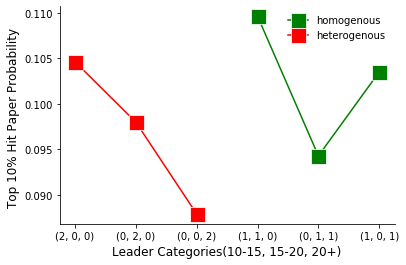

In [75]:
plt.figure(figsize=(6,4))
ax=sns.lineplot(data=a, x="seniority1", y="prob",hue='type',marker="s",markersize=15,palette=
               ['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Top 10% Hit Paper Probability ',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

##### mean percentile

In [21]:
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

In [33]:
data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(10000,random_state=100))

0
1
2
3
4
5


In [34]:
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       

In [35]:
data1['type']=data1['seniority1'].apply(lambda x: homo(x))

In [36]:
len(data1)

600000

In [37]:
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


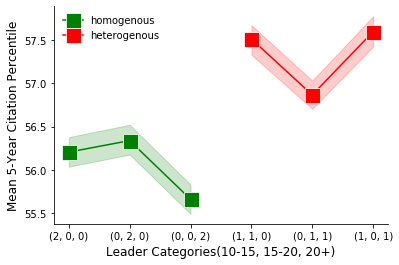

In [40]:
plt.figure(figsize=(6,4))
ax=sns.lineplot(data=data1, x="seniority1", y="citation5_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('/home/xh3993/sharedleadership/picture/homo_hete.png',dpi=300)
plt.show()

In [80]:
choose_data.groupby(['seniority1'])['leader_range'].median()

seniority1
(0, 0, 2)     4.0
(0, 1, 1)     8.0
(0, 2, 0)     1.0
(1, 0, 1)    12.0
(1, 1, 0)     5.0
(2, 0, 0)     1.0
Name: leader_range, dtype: float64

##### robust test

In [110]:
data=pd.read_csv('/data/sharedleadership/team2.csv')

In [113]:
data['sci_age']=data['sci_age'].apply(lambda x: eval(x))

In [112]:
def seniority_7_12_17(x): #7_12_17
    return 1 if len([i for i in x if i>=7])==0 else 0,len([i for i in x if (i>=7)&(i<12)]),len([i for i in x if (i>=12)&(i<17)]),len([i for i in x if i>=17])

In [118]:
data['seniority_7_12_17']=data['sci_age'].apply(lambda x: seniority_7_12_17(x))
data['seniority_n_7_12_17']=data['seniority_7_12_17'].apply(lambda x: np.sum(x))
data['seniority1_7_12_17']=data['seniority_7_12_17'].apply(lambda x: str(x[1:]))

In [120]:
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

In [121]:
def position_7(x):
    a=[]
    for e,i in enumerate(x):
        if i>=7:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position_7(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]

In [122]:
data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1_7_12_17']==n]
    for q in range(10):
        data1=data1.append(_.sample(10000,random_state=100))

0
1
2
3
4
5


In [124]:
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       

In [128]:
data1['type']=data1['seniority1_7_12_17'].apply(lambda x: homo(x))

In [129]:
data1['seniority1_7_12_17']=pd.Categorical(data1['seniority1_7_12_17'],categories=e,ordered=True)

In [2]:
choose_data=pd.read_csv('/data/sharedleadership/choose_data.csv')

/home/xh3993/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
choose_data['sci_age']=choose_data['sci_age'].apply(lambda x: eval(x))

In [45]:
def seniority_13_18_23(x): #13_18_23
    return 1 if len([i for i in x if i>=13])==0 else 0,len([i for i in x if (i>=13)&(i<18)]),len([i for i in x if (i>=18)&(i<23)]),len([i for i in x if i>=23])

In [46]:
choose_data['seniority_13_18_23']=choose_data['sci_age'].apply(lambda x: seniority_13_18_23(x))
choose_data['seniority_n_13_18_23']=choose_data['seniority_13_18_23'].apply(lambda x: np.sum(x))
choose_data['seniority1_13_18_23']=choose_data['seniority_13_18_23'].apply(lambda x: str(x[1:]))

In [47]:
Counter(choose_data['seniority1_13_18_23'])

Counter({'(0, 0, 0)': 40483,
         '(2, 0, 0)': 59508,
         '(1, 0, 0)': 85923,
         '(1, 1, 0)': 67040,
         '(0, 1, 0)': 57516,
         '(1, 0, 1)': 67469,
         '(0, 0, 1)': 54612,
         '(0, 1, 1)': 41159,
         '(0, 0, 2)': 25514,
         '(0, 2, 0)': 22469})

In [59]:
data2=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1_13_18_23']==n]
    for q in range(10):
        data2=data2.append(_.sample(10000,random_state=100))

0
1
2
3
4
5


In [65]:
data2['type']=data2['seniority1_13_18_23'].apply(lambda x: homo(x))

In [66]:
data2['seniority1_13_18_23']=pd.Categorical(data2['seniority1_13_18_23'],categories=e,ordered=True)

In [48]:
def seniority_15_20_25(x): #15_20_25
    return 1 if len([i for i in x if i>=15])==0 else 0,len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if (i>=20)&(i<25)]),len([i for i in x if i>=25])

In [49]:
choose_data['seniority_15_20_25']=choose_data['sci_age'].apply(lambda x: seniority_15_20_25(x))
choose_data['seniority_n_15_20_25']=choose_data['seniority_15_20_25'].apply(lambda x: np.sum(x))
choose_data['seniority1_15_20_25']=choose_data['seniority_15_20_25'].apply(lambda x: str(x[1:]))

In [50]:
Counter(choose_data['seniority1_15_20_25'])

Counter({'(0, 0, 0)': 92369,
         '(1, 0, 0)': 115114,
         '(1, 1, 0)': 44164,
         '(1, 0, 1)': 41015,
         '(2, 0, 0)': 41221,
         '(0, 0, 1)': 61446,
         '(0, 1, 0)': 71791,
         '(0, 2, 0)': 14618,
         '(0, 1, 1)': 24913,
         '(0, 0, 2)': 15042})

In [68]:
data3=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1_15_20_25']==n]
    for q in range(10):
        data3=data3.append(_.sample(10000,random_state=100))

0
1
2
3
4
5


In [69]:
data3['type']=data3['seniority1_15_20_25'].apply(lambda x: homo(x))

In [71]:
data3['seniority1_15_20_25']=pd.Categorical(data3['seniority1_15_20_25'],categories=e,ordered=True)

In [74]:
def seniority_10_17_24(x):#10_17_24
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<17)]),len([i for i in x if (i>=17)&(i<24)]),len([i for i in x if i>=24])

In [75]:
choose_data['seniority_10_17_24']=choose_data['sci_age'].apply(lambda x: seniority_10_17_24(x))
choose_data['seniority_n_10_17_24']=choose_data['seniority_10_17_24'].apply(lambda x: np.sum(x))
choose_data['seniority1_10_17_24']=choose_data['seniority_10_17_24'].apply(lambda x: str(x[1:]))

In [76]:
Counter(choose_data['seniority1_10_17_24'])

Counter({'(2, 0, 0)': 154057,
         '(1, 1, 0)': 159872,
         '(1, 0, 1)': 94648,
         '(0, 1, 1)': 50237,
         '(0, 2, 0)': 43336,
         '(0, 0, 2)': 19543})

In [77]:
data4=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1_10_17_24']==n]
    for q in range(10):
        data4=data4.append(_.sample(10000,random_state=100))

0
1
2
3
4
5


In [78]:
data4['type']=data4['seniority1_10_17_24'].apply(lambda x: homo(x))
data4['seniority1_10_17_24']=pd.Categorical(data4['seniority1_10_17_24'],categories=e,ordered=True)

In [82]:
def seniority_10_20_30(x):#10_20_30
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<20)]),len([i for i in x if (i>=20)&(i<30)]),len([i for i in x if i>=30])

In [83]:
choose_data['seniority_10_20_30']=choose_data['sci_age'].apply(lambda x: seniority_10_20_30(x))
choose_data['seniority_n_10_20_30']=choose_data['seniority_10_20_30'].apply(lambda x: np.sum(x))
choose_data['seniority1_10_20_30']=choose_data['seniority_10_20_30'].apply(lambda x: str(x[1:]))

In [84]:
Counter(choose_data['seniority1_10_20_30'])

Counter({'(2, 0, 0)': 248704,
         '(1, 1, 0)': 177697,
         '(1, 0, 1)': 40719,
         '(0, 2, 0)': 33578,
         '(0, 1, 1)': 17094,
         '(0, 0, 2)': 3901})

In [89]:
data5=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1_10_20_30']==n]
    for q in range(30):
        data5=data5.append(_.sample(3901,random_state=100))

0
1
2
3
4
5


In [94]:
data5['type']=data5['seniority1_10_20_30'].apply(lambda x: homo(x))
data5['seniority1_10_20_30']=pd.Categorical(data5['seniority1_10_20_30'],categories=e,ordered=True)

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-pack

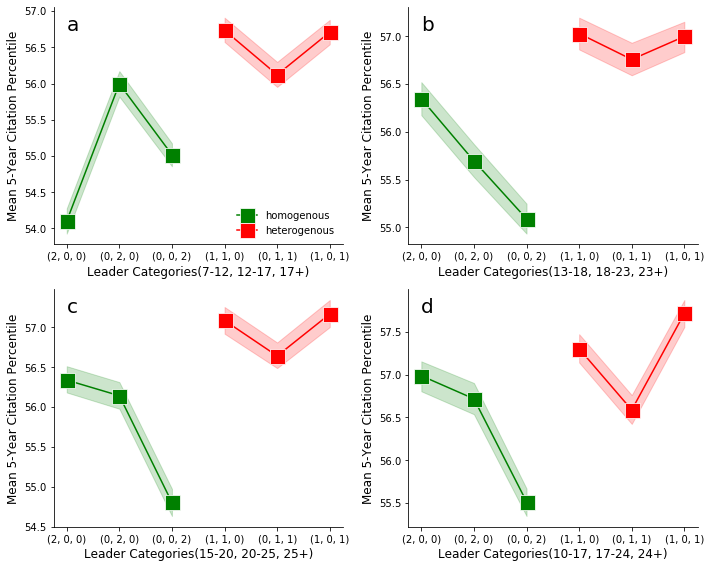

In [134]:
fig=plt.figure(figsize=(10,8))

ax = plt.subplot(2, 2, 1)
ax=sns.lineplot(data=data1, x="seniority1_7_12_17", y="citation5_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(7-12, 12-17, 17+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'],loc='lower right')
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'a',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(2, 2, 2)
ax=sns.lineplot(data=data2, x="seniority1_13_18_23", y="citation5_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(13-18, 18-23, 23+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.legend_.remove()
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'b',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = plt.subplot(2, 2, 3)
ax=sns.lineplot(data=data3, x="seniority1_15_20_25", y="citation5_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(15-20, 20-25, 25+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.legend_.remove()
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'c',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(2, 2, 4)
ax=sns.lineplot(data=data4, x="seniority1_10_17_24", y="citation5_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-17, 17-24, 24+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.legend_.remove()
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'d',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()
plt.savefig('/home/xh3993/sharedleadership/picture/homo_hete_robust.png',dpi=300)
plt.show()

##### continous variables

In [83]:
a=choose_data.groupby(['leader_range'])['citation5_rank'].mean().reset_index()

In [86]:
a=a[a['leader_range']<=16]

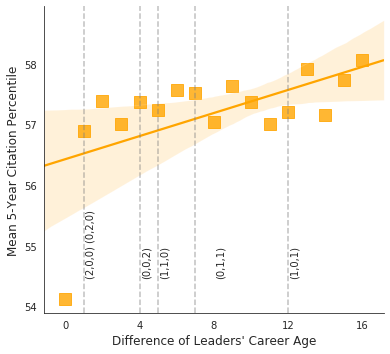

In [87]:
sns.set_style(style='white') 
sns.lmplot(x="leader_range", y="citation5_rank", data=a,line_kws={'color': 'orange'},scatter_kws={'color': 'orange','s':150}, fit_reg=True,legend=False,markers='s',height=5, aspect=1.1)

plt.axvline(x=1,color='grey',ls='--',alpha=0.5)
plt.text(1.1,54.5,'(2,0,0) (0,2,0)',rotation=90)
plt.axvline(x=4,color='grey',ls='--',alpha=0.5)
plt.text(4.1,54.5,'(0,0,2)',rotation=90)
plt.axvline(x=5,color='grey',ls='--',alpha=0.5)
plt.text(5.1,54.5,'(1,1,0)',rotation=90)
plt.axvline(x=7,color='grey',ls='--',alpha=0.5)
plt.text(8.1,54.5,'(0,1,1)',rotation=90)
plt.axvline(x=12,color='grey',ls='--',alpha=0.5)
plt.text(12.1,54.5,'(1,0,1)',rotation=90)

plt.xlabel("Difference of Leaders' Career Age",fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.xticks([0,4,8,12,16])
plt.savefig('/home/xh3993/sharedleadership/picture/leader_range.png',dpi=300)
plt.show()

In [70]:
choose_data['first']=choose_data['sci_age'].apply(lambda x: x[0])

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
data_senior=choose_data[choose_data['first']<10]

In [72]:
len(data_senior)

351140

In [73]:
a=data_senior.groupby(['seniority1','first'])['citation5_rank'].mean().reset_index()

In [74]:
a['mean']=a.apply(lambda x: (x['citation5_rank']-a[a['first']==x['first']]['citation5_rank'].mean())/a[a['first']==x['first']]['citation5_rank'].std(),axis=1)

In [75]:
a['seniority1']=pd.Categorical(a['seniority1'],categories=e,ordered=True)

In [76]:
a['type']=a['seniority1'].apply(lambda x: homo(x))

In [77]:
a['student']=a['first']

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-pack

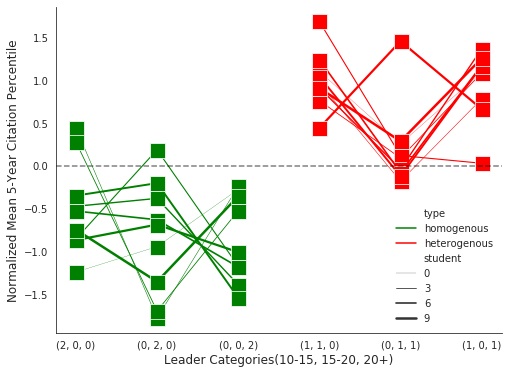

In [79]:
plt.figure(figsize=(8,6))
ax=sns.lineplot(x="seniority1", y="mean",hue='type',size='student',data=a,palette=['green','red'],marker='s',markersize=15,sizes=(.25, 2.5))
# ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')
plt.axhline(y=0,color='black',ls='--',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Normalized Mean 5-Year Citation Percentile',fontsize=12)
# plt.xticks(rotation = 45)
plt.legend(frameon=False)
plt.savefig('/home/xh3993/sharedleadership/picture/student.png',dpi=300)
plt.show()

In [88]:
choose_data['team size']=choose_data['len'].apply(lambda x: 'large' if x>=3 else 'small')

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
choose_data['seniority1']=pd.Categorical(choose_data['seniority1'],categories=e,ordered=True)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
choose_data['type']=choose_data['seniority1'].apply(lambda x: homo(x))

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-pack

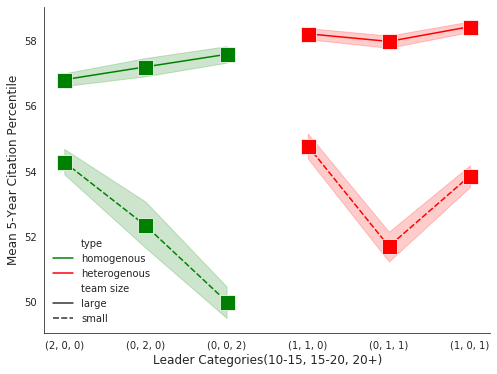

In [98]:
plt.figure(figsize=(8,6))
ax=sns.lineplot(data=choose_data, x="seniority1", y="citation5_rank",hue='type',style='team size',marker="s",markersize=15,palette=
               ['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/xh3993/sharedleadership/picture/teamsize.png',dpi=300)
plt.show()

In [96]:
choose_data['diversity']=1-choose_data['keyword_sim']

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


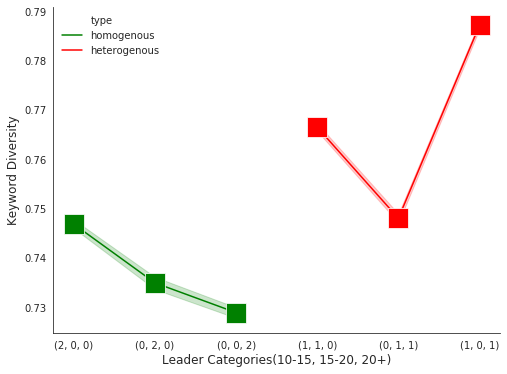

In [99]:
plt.figure(figsize=(8,6))
ax=sns.lineplot(data=choose_data, x="seniority1", y="diversity",hue='type',marker="s",markersize=20,palette=
               ['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Keyword Diversity',fontsize=12)
plt.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/xh3993/sharedleadership/picture/keyword.png',dpi=300)
plt.show()

In [100]:
choose_data['diversity1']=choose_data['diversity'].apply(lambda x: np.round(x,1) if x==x else np.nan)
a=choose_data.groupby('diversity1')['citation5_rank'].mean().reset_index()
a=a[a['diversity1']>=0.5]

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
colors = sns.color_palette("Set1")[:10]

In [102]:
colors = ['red', 'orange', 'green']

In [104]:
all_data=pd.read_csv('/data/sharedleadership/all_data.csv')

/home/xh3993/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [105]:
all_data.head(1)

,tid,aid,year,references,references_year,Reference Range,Reference SD,Reference Mean,sci_age,references_year1,venue,indexed_abstract,doi,title
0,1091,"[2312688602, 2482909946, 2128134587, 210178269...",2013.0,"[2005687710, 2018037215]","[2011, 2011]",0.0,0.0,2.0,"[1, 1, 16, 20, 20, 6, 17, 13]","[2, 2]",{'raw': 'International Conference on Human-Com...,"{'IndexLength': 58, 'InvertedIndex': {'tool.':...",10.1007/978-3-642-39476-8_19,Preliminary Design of a Network Protocol Learn...


In [112]:
all_data['aid']=all_data['aid'].apply(lambda x: eval(x) if x==x else x)

In [114]:
all_data['len']=all_data['aid'].apply(lambda x: len(x) if x==x else 0)

In [123]:
one=all_data[all_data['len']==1]

In [125]:
one['sci_age']=one['sci_age'].apply(lambda x: eval(x)[0])

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
a=one.groupby(['sci_age'])['Reference Range'].mean().reset_index()

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-pack

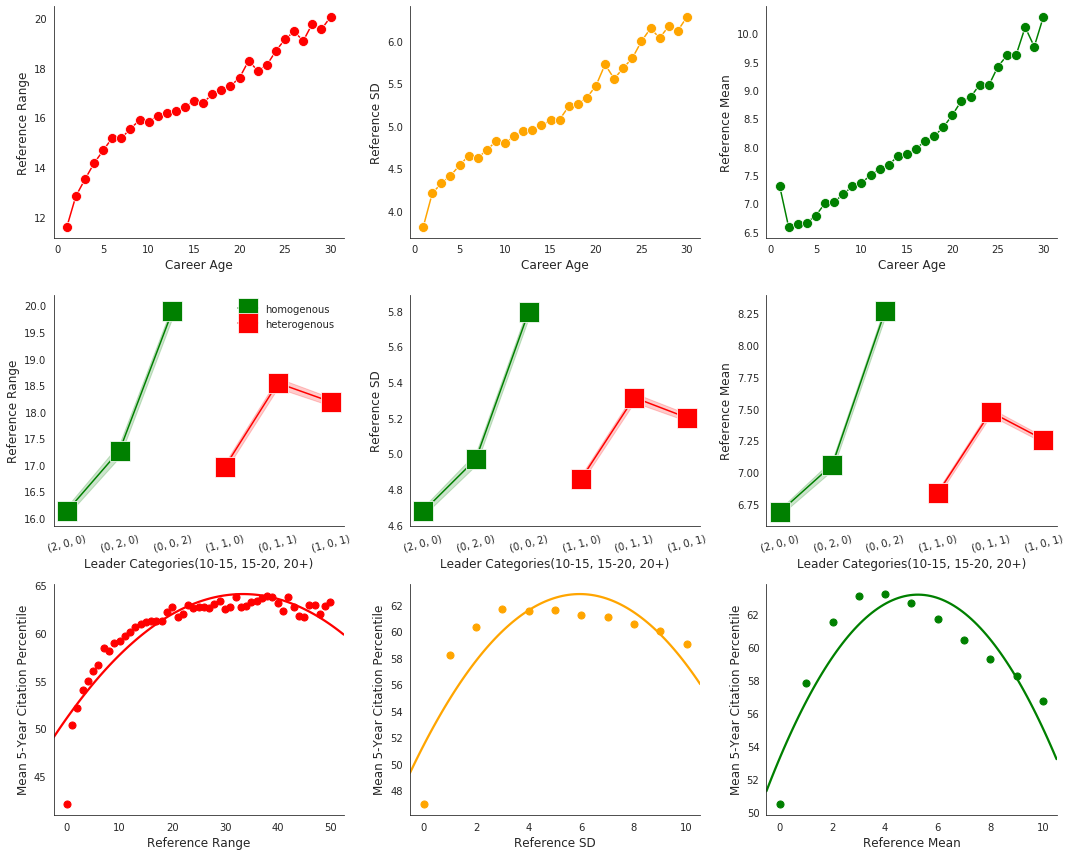

In [131]:
fig=plt.figure(figsize=(15,12))
ax = plt.subplot(3, 3, 1)
a=one.groupby(['sci_age'])['Reference Range'].mean().reset_index()
a=a[a['sci_age']<=30]
sns.lineplot(data=a, x="sci_age", y="Reference Range",marker='.',markersize=20,color=colors[0])
plt.xlabel('Career Age',fontsize=12)
plt.ylabel('Reference Range',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 2)
a=one.groupby(['sci_age'])['Reference SD'].mean().reset_index()
a=a[a['sci_age']<=30]
sns.lineplot(data=a, x="sci_age", y="Reference SD",marker='.',markersize=20,color=colors[1])
plt.xlabel('Career Age',fontsize=12)
plt.ylabel('Reference SD',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 3)
a=one.groupby(['sci_age'])['Reference Mean'].mean().reset_index()
a=a[a['sci_age']<=30]
sns.lineplot(data=a, x="sci_age", y="Reference Mean",marker='.',markersize=20,color=colors[2])
plt.xlabel('Career Age',fontsize=12)
plt.ylabel('Reference Mean',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



ax = plt.subplot(3, 3, 4)
ax=sns.lineplot(data=choose_data, x="seniority1", y="reference_range",hue='type',marker="s",markersize=20,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Reference Range',fontsize=12)
plt.legend(frameon=False,labels=['homogenous','heterogenous'])
plt.xticks(rotation = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 5)
ax=sns.lineplot(data=choose_data, x="seniority1", y="reference_SD",hue='type',marker="s",markersize=20,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Reference SD',fontsize=12)
ax.get_legend().remove()
plt.xticks(rotation = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 6)
ax=sns.lineplot(data=choose_data, x="seniority1", y="reference_mean",hue='type',marker="s",markersize=20,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Reference Mean',fontsize=12)
ax.get_legend().remove()
plt.xticks(rotation = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = plt.subplot(3, 3, 7)
a=choose_data.groupby('reference_range')['citation5_rank'].mean().reset_index()
a=a[a['reference_range']<=50]
ax=sns.regplot(x="reference_range", y="citation5_rank", data=a, ci=None,color=colors[0],
           scatter_kws={"s": 50, "alpha": 1},order=2)
plt.xlabel('Reference Range',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 8)
choose_data['reference_SD1']=choose_data['reference_SD'].apply(lambda x: int(x) if x==x else np.nan)
a=choose_data.groupby('reference_SD1')['citation5_rank'].mean().reset_index()
a=a[a['reference_SD1']<=10]
ax=sns.regplot(x="reference_SD1", y="citation5_rank", data=a, ci=None,color=colors[1],
           scatter_kws={"s": 50, "alpha": 1},order=2)
plt.xlabel('Reference SD',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3, 3, 9)
choose_data['reference_mean1']=choose_data['reference_mean'].apply(lambda x: int(x) if x==x else np.nan)
a=choose_data.groupby('reference_mean1')['citation5_rank'].mean().reset_index()
a=a[(a['reference_mean1']<=10)&(a['reference_mean1']>=0)]
ax=sns.regplot(x="reference_mean1", y="citation5_rank", data=a, ci=None,color=colors[2],
           scatter_kws={"s": 50, "alpha": 1},order=2)
plt.xlabel('Reference Mean',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('/home/xh3993/sharedleadership/picture/reference.png',dpi=300)
plt.show()

#### keyword_citation

In [495]:
a=data1.groupby('seniority1').agg({'reference_mean':'mean','citation5_rank':'mean'}).reset_index()

In [496]:
a['type']=a['seniority1'].apply(lambda x: homo(x))

In [497]:
a['reference_mean']=a['reference_mean'].apply(lambda x: np.around(x,1))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


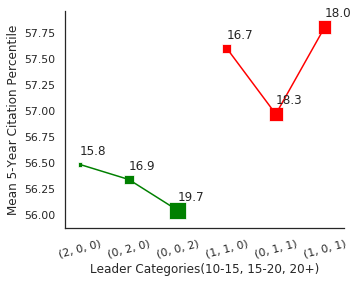

In [482]:
plt.figure(figsize=(5,4))
sns.lineplot(x = 'seniority1', y = 'citation5_rank', hue = 'type', data = a,palette=['green','red'],legend=False)
ax=sns.scatterplot(x = 'seniority1', y = 'citation5_rank', hue = 'type', size = 'reference_range', data = a,marker='s',palette=['green','red'],sizes=(20,300),legend=False)
plt.legend(frameon=False,loc='lower right')

for i in range(a.shape[0]):
    plt.text(x=a.seniority1[i],y=a.citation5_rank[i]+0.1,s=a.reference_range[i])

plt.xticks(rotation = 15)
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [469]:
a=data1.groupby('seniority1').agg({'diversity':'mean','citation5_rank':'mean'}).reset_index()

In [470]:
a['type']=a['seniority1'].apply(lambda x: homo(x))

In [471]:
a['diversity']=a['diversity'].apply(lambda x: np.round(x,2))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


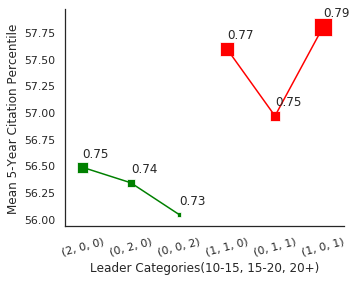

In [474]:
plt.figure(figsize=(5,4))
sns.lineplot(x = 'seniority1', y = 'citation5_rank', hue = 'type', data = a,palette=['green','red'],legend=False)
ax=sns.scatterplot(x = 'seniority1', y = 'citation5_rank', hue = 'type', size = 'diversity', data = a,marker='s',palette=['green','red'],sizes=(20,300),legend=False)
plt.legend(frameon=False,loc='lower right')

for i in range(a.shape[0]):
    plt.text(x=a.seniority1[i],y=a.citation5_rank[i]+0.1,s=a.diversity[i])

plt.xticks(rotation = 15)
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

##### evaluation leadership

In [47]:
choose_data=pd.read_csv('/data/sharedleadership/choose_data.csv')

/home/xh3993/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
all_data=pd.read_csv('/data/sharedleadership/all_data.csv')

/home/xh3993/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
doi_dict=dict(all_data[['tid','doi']].values)

In [48]:
choose_data['doi']=choose_data['tid'].apply(lambda x: doi_dict[str(x)] if str(x) in doi_dict else '')

In [177]:
choose_data['position']=choose_data['position'].apply(lambda x: eval(x))

In [49]:
choose_data.head(1)

,tid,aname,aid,aorg,p_year,references,fos,citation2,citation5,references_age,...,last_two,first_last,first,team size,type,diversity,diversity1,reference_SD1,reference_mean1,doi
0,12993,"['Reiko Heckel', 'Tom Mens', 'Michel Wermeling...","[1978340988, 1986880241, 2307186118]","[nan, nan, nan]",2003,NaN,"['Software engineering', 'Computer science', '...",0,0,NaN,...,"[1.0, 2.0]","[0, 2.0]",9,large,homogenous,0.661642,0.7,NaN,NaN,NaN


In [19]:
f = open('/home/xh3993/socialcomparison/fenglixu-Self-report-Contribution-Data-6164803/PLOSONE_Contribution_Data', 'rb')
plos_data = pickle.load(f)
f.close()

In [50]:
len(set(choose_data['doi'].values)&set([i[0] for i in plos_data]))

15

In [57]:
plos_overlap=set(choose_data['doi'].values)&set([i[0] for i in plos_data])

In [670]:
leader=["conceive","design","lead","supervise","coordinate","interpret","write",'wrote','theor']

In [671]:
c=[]
for i,j in zip([i[4] for i in plos_data if i[0] in plos_overlap],[i[3] for i in plos_data if i[0] in plos_overlap]): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [672]:
a=[]
for m in [i[0] for i in plos_data if i[0] in plos_overlap]:
    a.extend(list(choose_data[choose_data['doi']==m]['position'].values))

In [673]:
count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [29]:
f = open('/home/xh3993/socialcomparison/fenglixu-Self-report-Contribution-Data-6164803/Nature_Contribution_Data', 'rb')
nature_data = pickle.load(f)
f.close()

In [53]:
len(set(choose_data['doi'].values)&set([i[0] for i in nature_data]))

10

In [293]:
nature_overlap=list(set(choose_data['doi'].values)&set([i[0] for i in nature_data]))

In [456]:
from nltk.tokenize import word_tokenize

In [654]:
standard_nature=[]
for o in nature_overlap:
    i=[j[4] for j in nature_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_nature.append(a)

In [655]:
nature_name=[]
for o in nature_overlap:
    nature_name.append([j[3] for j in nature_data if j[0]==o][0])

In [674]:
c=[]
for i,j in zip(standard_nature, nature_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [675]:
a=[]
for m in nature_overlap:
    a.extend(list(choose_data[choose_data['doi']==m]['position'].values))

In [676]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [31]:
f = open('/home/xh3993/socialcomparison/fenglixu-Self-report-Contribution-Data-6164803/Science_Contribution_Data', 'rb')
science_data = pickle.load(f)
f.close()

In [624]:
science_data[3][4]

'D.K., D.J.S., and S.O. conceptualized the pure reconstitution and developed the methodology; D.J.S., S.O., R.X., R.J.T, and A.H.G. performed validation and investigation for the reconstitution. D.K., R.X., R.J.T., and A.H.G. conceptualized flow cytometry of the proteoliposomes. R.X., R.J.T., and A.H.G. developed the flow cytometry methodology and performed validation and investigations. D.K., D.J.N., R.X., R.J.T., and A.H.G. conceptualized the confocal microscopy. R.X., R.J.T., A.H.G., and P.J.F. developed the confocal microscopy methodology and performed validation and investigations. Resources were provided by D.K. and D.J.N. D.K., R.X., R.J.T. D.J.S., and A.H.G. wrote the manuscript, and all authors contributed edits. D.K. and D.J.N administered the project and acquired funding.'

In [54]:
len(set(choose_data['doi'].values)&set([i[0] for i in science_data]))

0

In [35]:
f = open('/home/xh3993/socialcomparison/fenglixu-Self-report-Contribution-Data-6164803/PNAS_Contribution_Data', 'rb')
pnas_data = pickle.load(f)
f.close()

In [55]:
len(set(choose_data['doi'].values)&set([i[0] for i in pnas_data]))

8

In [659]:
pnas_overlap=list(set(choose_data['doi'].values)&set([i[0] for i in pnas_data]))

In [660]:
standard_pnas=[]
for o in pnas_overlap:
    i=[j[4] for j in pnas_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_pnas.append(a)

In [661]:
pnas_name=[]
for o in pnas_overlap:
    pnas_name.append([j[3] for j in pnas_data if j[0]==o][0])

In [677]:
c=[]
for i,j in zip(standard_pnas, pnas_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [678]:
a=[]
for m in pnas_overlap:
    a.extend(list(choose_data[choose_data['doi']==m]['position'].values))

In [679]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [680]:
len(count)

33

In [681]:
len([i for i in count if i==True])/len(count)

0.7272727272727273

##### robust_test

In [8]:
new_data_dblp=pd.read_csv('/data/sharedleadership/dblp_new_version.csv')

In [9]:
new_data_dblp.columns

Index(['tid', 'p_year', 'aid', 'aname', 'aorg', 'aorgc', 'references', 'fos',
       'citation2', 'citation5', 'all_citation', 'team_size', 'agender',
       'aethnicity', 'career_age', 'mean_career_age', 'gini_career_age',
       'collaborator', 'mean_collaborator', 'gini_collaborator',
       'productivity', 'mean_productivity', 'gini_productivity'],
      dtype='object')

In [11]:
new_data_dblp.head(1)

,tid,p_year,aid,aname,aorg,aorgc,references,fos,citation2,citation5,...,aethnicity,career_age,mean_career_age,gini_career_age,collaborator,mean_collaborator,gini_collaborator,productivity,mean_productivity,gini_productivity
0,1091,2013,"[2312688602, 2482909946, 2128134587, 210178269...","['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...","['Shinshu University', 'Shinshu University', '...","['Japan', 'Japan', 'Japan', 'Japan', 'Japan', ...","[2005687710, 2018037215]","['Telecommunications network', 'Computer scien...",0,0,...,"[""asian"", ""asian"", ""asian"", ""asian"", ""asian"", ...","[1, 1, 16, 20, 20, 6, 17, 13]",11.75,0.351064,"[7, 7, 31, 26, 20, 30, 13, 11]",18.125,0.288793,"[1, 1, 30, 19, 9, 14, 9, 7]",11.25,0.436111


In [12]:
new_data_dblp['career_age']=new_data_dblp['career_age'].apply(lambda x: eval(x))

In [13]:
new_data_dblp['collaborator']=new_data_dblp['collaborator'].apply(lambda x: eval(x))

In [17]:
collaborator=defaultdict(lambda:[])
for i,j in zip(new_data_dblp['career_age'],new_data_dblp['collaborator']):
    for m,n in zip(i,j):
        collaborator[m].append(n)   

In [20]:
collaborator_pd=pd.DataFrame(collaborator.items())

In [23]:
collaborator_pd.head(1)

,0,1,mean
0,1,"[7, 7, 3, 4, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, ...",3.99209


In [22]:
collaborator_pd['mean']=collaborator_pd[1].apply(lambda x: np.mean(x))

In [24]:
len(collaborator_pd)

73

In [26]:
collaborator_pd=collaborator_pd[collaborator_pd[0]<=30]

Text(0, 0.5, 'Mean Collaborator Num')

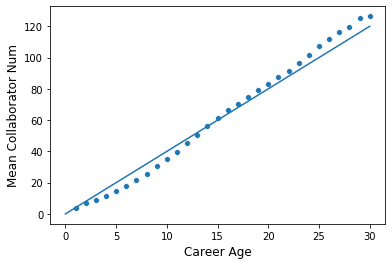

In [36]:
sns.scatterplot(data=collaborator_pd, x=0, y='mean')
plt.plot([0,5,10,15,20,25,30],[0,20,40,60,80,100,120])
plt.xlabel('Career Age',fontsize=12)
plt.ylabel('Mean Collaborator Num',fontsize=12)